## Code Attribution

The code presented in this section, which visualizes Fast Radio Bursts (FRBs) using dynamic spectra, is entirely my own work, authored by:

- **Dirk Kuiper**

This code does not draw from external sources or packages and represents an original implementation for the purpose of visualizing FRBs.

### Code Author
- **Dirk Kuiper**


In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from plotting import *
from scipy.stats import powerlaw

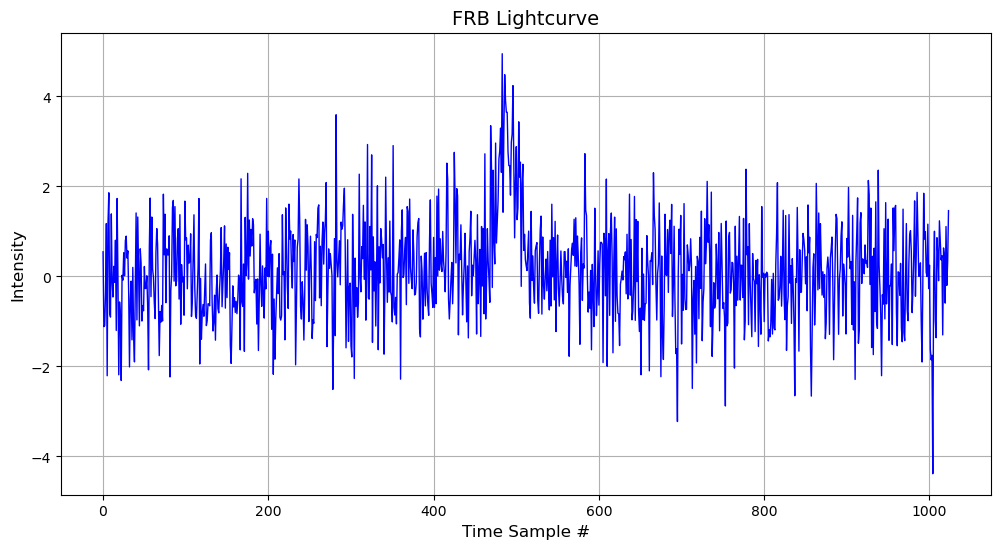

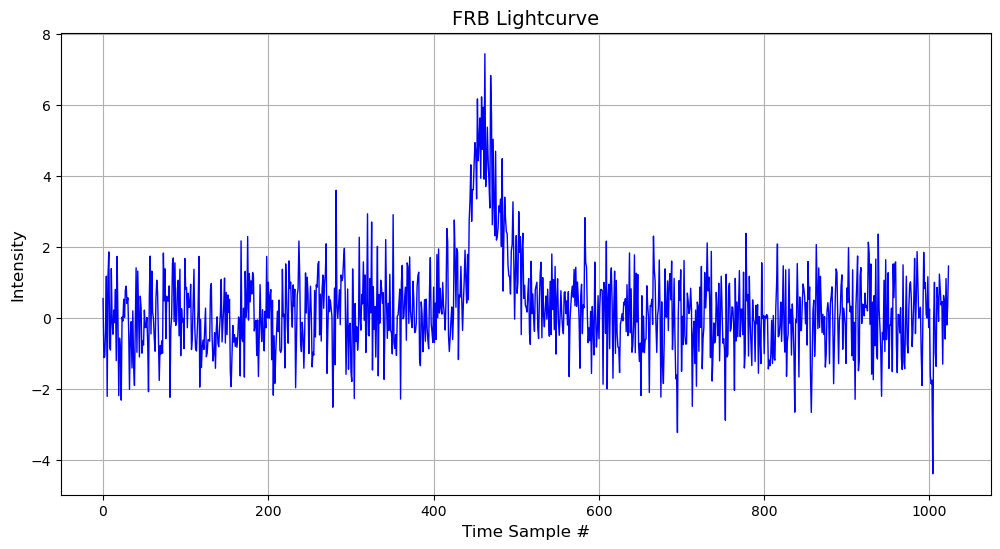

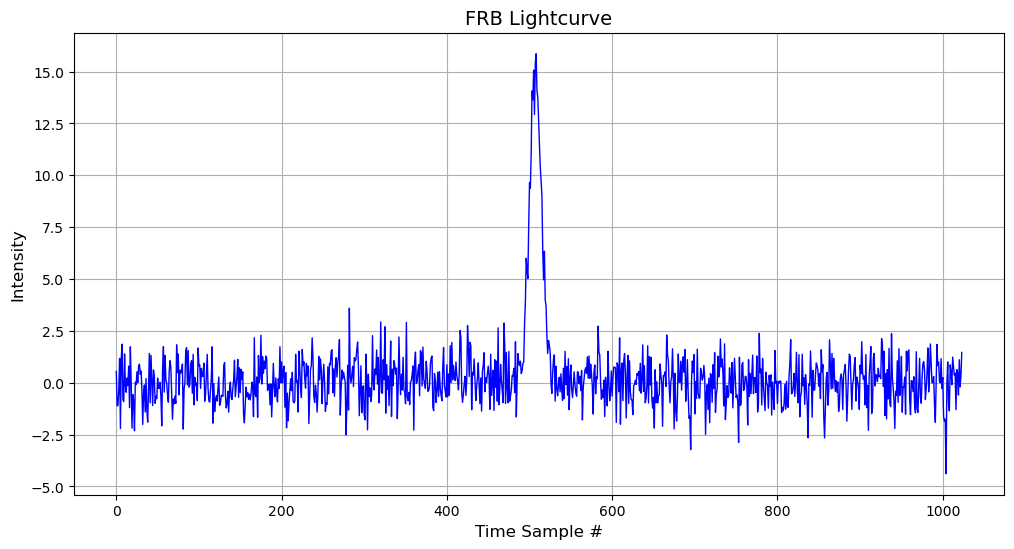

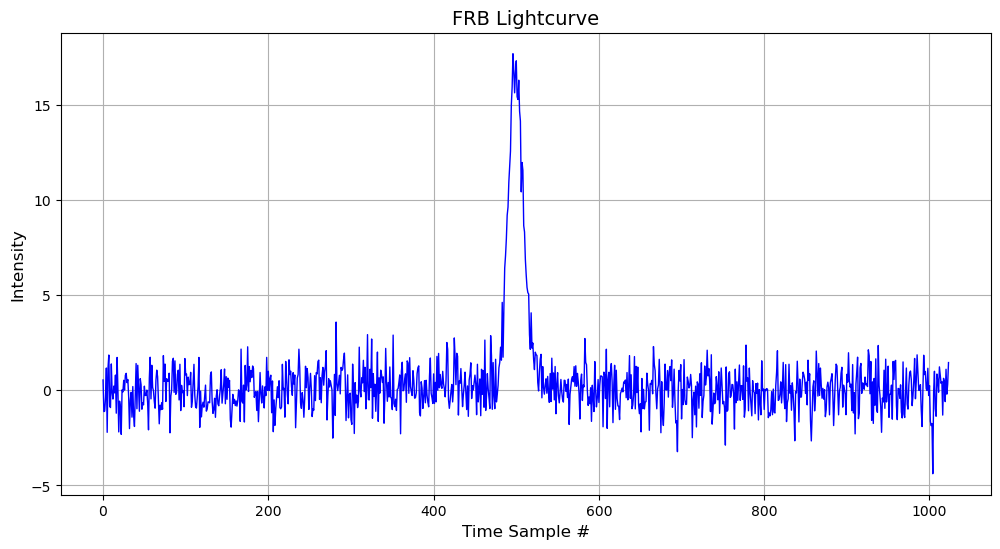

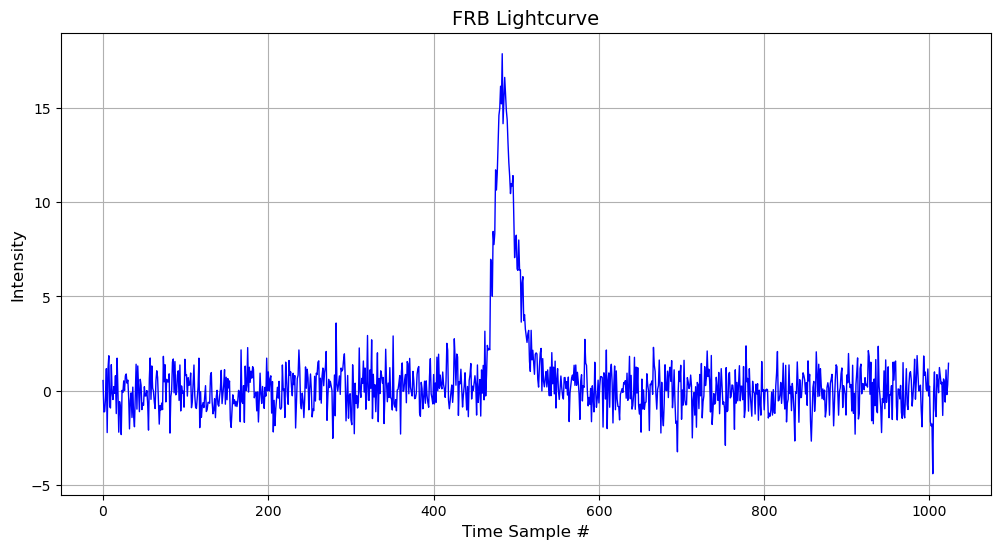

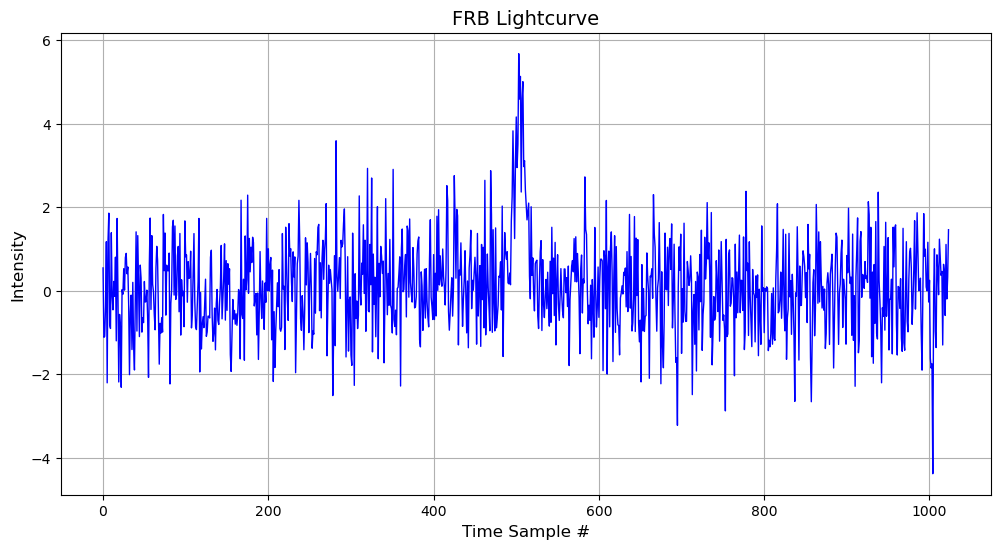

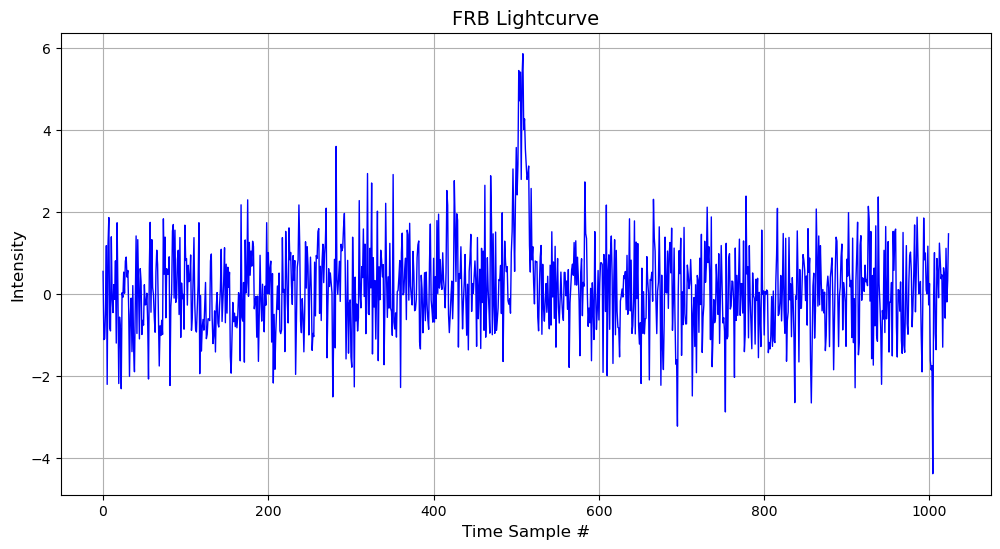

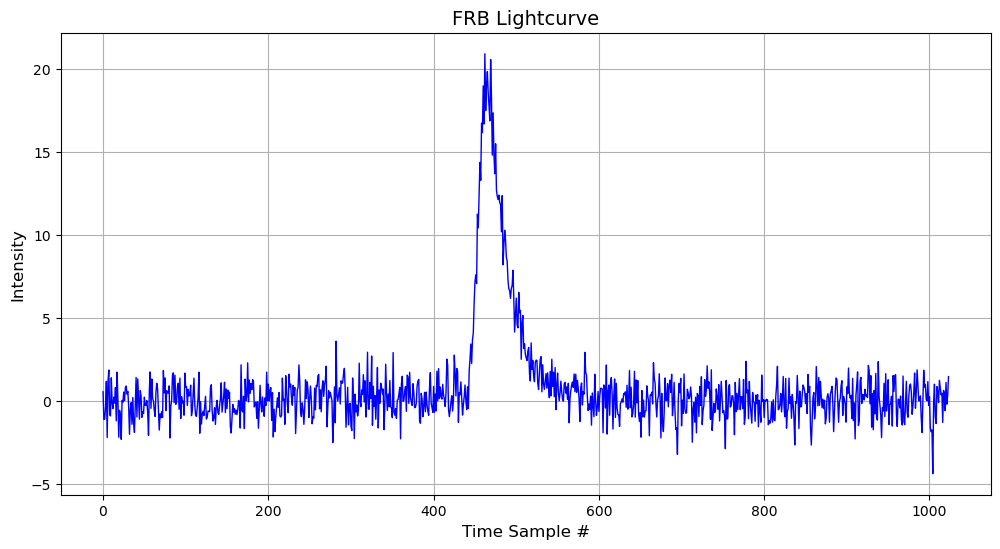

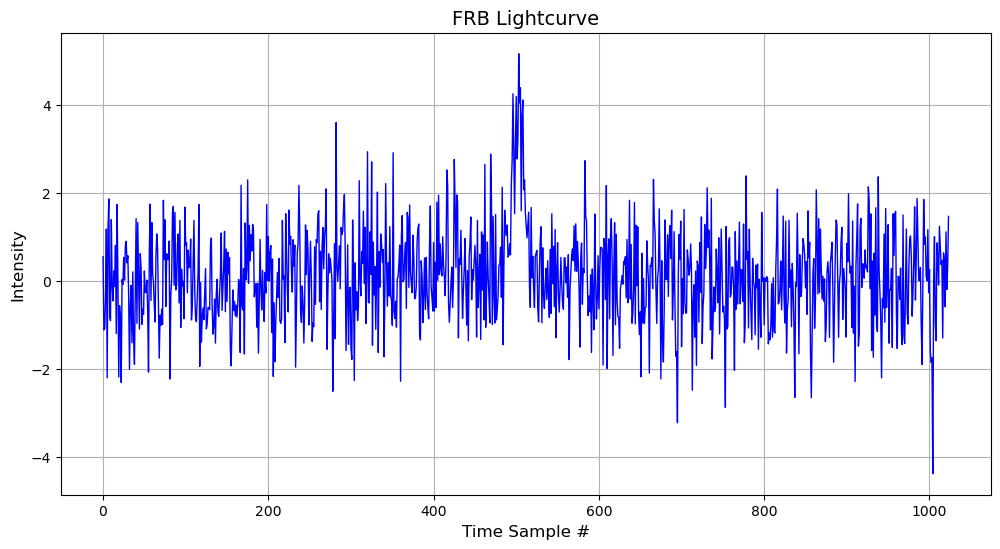

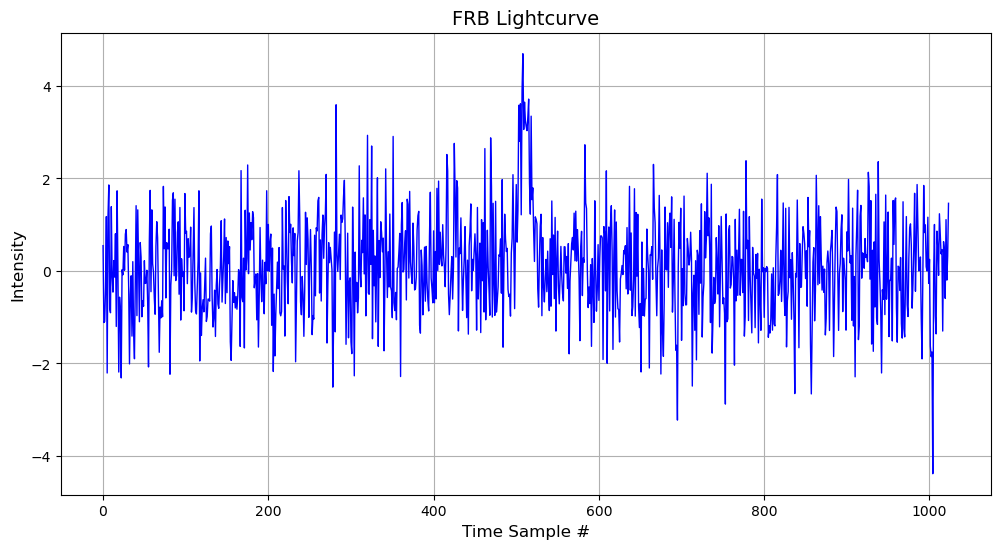

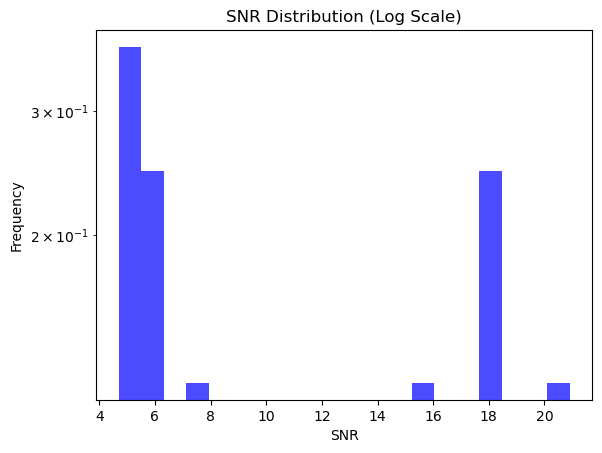

In [20]:
# Directory where the numpy arrays are saved
save_dir = "simulated_scattered_bursts"

# List all the numpy array files in the directory
file_list = [f for f in os.listdir(save_dir) if f.endswith(".npy")]

snrs = []
# Loop through the saved files and plot each burst
for i, file in enumerate(file_list):
    # Load the dynamic spectra from the numpy array
    dynamic_spectra_w_pulse = np.load(os.path.join(save_dir, file))
    
    # plot_dynamic_spectra(dynamic_spectra_w_pulse)

    lightcurve = np.sum(dynamic_spectra_w_pulse, axis=1)

    plot_lightcurve(time_samples=np.arange(1024), lightcurve=lightcurve)
    
    snrs.append(np.max(lightcurve))

    # Break the loop after the first 10 iterations
    if i >= 9:
        break

# Plot the SNRs on a log-log scale
plt.hist(snrs, bins=20, density=True, alpha=0.7, color='b')
plt.xlabel("SNR")
plt.ylabel("Frequency")
plt.title("SNR Distribution (Log Scale)")
plt.yscale('log')
plt.show()
